All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 333:
> In the lab, we applied random forests to the Boston data using `mtry=6` and using `ntree=25` and `ntree=500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `mtry` and `ntree`. You can model your plot after Figure 8.10. Describe the results obtained.

For reference, here is Figure 8.10:

![](https://drive.google.com/uc?export=view&id=11SrhJsv4bSqF3ajSRZ_84juG-snHNgc7)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


sns.set()
%matplotlib inline

In [7]:
boston = load_boston()
# Because this exercise requires all features to be in one table,
# loading straight from the CSV is easier.
bostondf = pd.read_csv(boston.filename, skiprows=1)

x = (bostondf.drop('CRIM', axis='columns')
             .assign(intercept=1)
)
y = bostondf.CRIM

In [13]:
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y)
p = x_train.shape[1]

In [26]:
result = []
for ntree in range(1, 501):
  row = []
  for mtry in [1, 2, round(np.sqrt(p)), p//2, p]:
    model = RandomForestRegressor(n_estimators=ntree, max_features=mtry)
    model.fit(x_train, y_train)
    row.append(model.score(x_test, y_test))
  result.append(row)

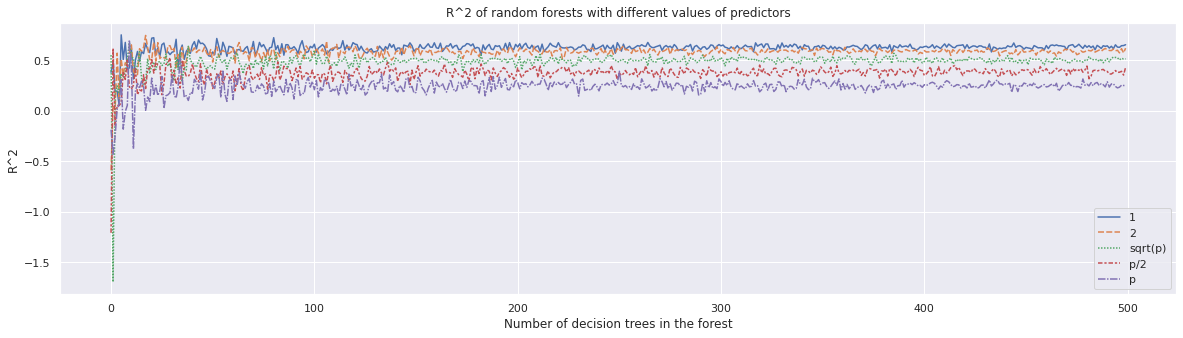

In [31]:
scores = pd.DataFrame(result, columns=['1', '2', 'sqrt(p)', 'p/2', 'p'])

plt.figure(figsize=(20, 5))
sns.lineplot(data=scores)
plt.title('R^2 of random forests with different values of predictors')
plt.xlabel('Number of decision trees in the forest')
plt.ylabel('R^2')
plt.show()

Interestingly, with this dataset, the fewer predictors you use, the better is $R^2$. The number of trees does not matter much after you surpass one hundred.